## Objective:
##### Develop a predictive model using machine learning algorithms to accurately classify breast cancer cases as malignant or benign based on a comprehensive set of input features. The goal is to enhance early detection capabilities, improve diagnostic accuracy, and contribute to the development of an efficient and reliable tool for breast cancer diagnosis, ultimately aiding healthcare professionals in making informed decisions and improving patient outcomes. This prediction will make it faster and more efficient in healthcare sectors which will be a time-consuming process.

## Importing Libraries

In [34]:
# Necessary Libraries
# Importing numpy, pandas.
import numpy as np
import pandas as pd

# Data visualization libraries(matplotlib,seaborn).
import seaborn as sns
import matplotlib.pyplot as plt

# Label encoding for categorical variables.
from sklearn.preprocessing import LabelEncoder 

# Splitting data.
from sklearn.model_selection import train_test_split

# Standardizing data.
from sklearn.preprocessing import StandardScaler

# Metrics for model evaluation.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing warnings library. The warnings module handles warnings in Python. 
import warnings

# Filter warnings to ignore them during execution.
warnings.filterwarnings('ignore')

## Reading the Data from CSV File
In this section, we will load and view the CSV file and its contents.

Filename: breast_cancer_data.csv

This dataset is sourced from the online repository of UCI.

### Link: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [76]:
# Reading the data and printing the first 10 rows of it
df = pd.read_csv('breast_cancer_data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Dataset
Breast Cancer Wisconsin dataset contains 569 samples of malignant and benign tumor cells.

* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant. 

### <b>Attribute Information: </b>

1. **ID**: Unique identifier for each sample.

2. **Diagnosis**: Target variable indicating whether a sample is benign (B) or malignant (M).

3-12. **Mean features**:
   - **radius_mean**: Mean distance from the center to points on the perimeter of cell nuclei.
   - **texture_mean**: Standard deviation of gray-scale values in the image.
   - **perimeter_mean**: Average perimeter of cell nuclei.
   - **area_mean**: Average area enclosed by cell nuclei.
   - **smoothness_mean**: Local variation in radius lengths.
   - **compactness_mean**: Measure of how compact the shape of cell nuclei is.
   - **concavity_mean**: Severity of concave portions of the contour of cell nuclei.
   - **concave points_mean**: Number of concave portions of the contour of cell nuclei.
   - **symmetry_mean**: Symmetry of cell nuclei.
   - **fractal_dimension_mean**: "Coastline approximation" - 1.

13-22. **Standard Error (SE) features**:
   - **radius_se**: Standard error of the mean distance from the center to points on the perimeter of cell nuclei.
   - **texture_se**: Standard error of the standard deviation of gray-scale values in the image.
   - **perimeter_se**: Standard error of the perimeter of cell nuclei.
   - **area_se**: Standard error of the area enclosed by cell nuclei.
   - **smoothness_se**: Standard error of the local variation in radius lengths.
   - **compactness_se**: Standard error of the compactness of the shape of cell nuclei.
   - **concavity_se**: Standard error of the severity of concave portions of the contour of cell nuclei.
   - **concave points_se**: Standard error of the number of concave portions of the contour of cell nuclei.
   - **symmetry_se**: Standard error of the symmetry of cell nuclei.
   - **fractal_dimension_se**: Standard error of the "coastline approximation" - 1.


23-32. **Worst features** (mean of three largest values):
   - **radius_worst**: Largest radius of cell nuclei.
   - **texture_worst**: Largest texture of cell nuclei.
   - **perimeter_worst**: Largest perimeter of cell nuclei.
   - **area_worst**: Largest area enclosed by cell nuclei.
   - **smoothness_worst**: Largest smoothness of cell nuclei.
   - **compactness_worst**: Largest compactness of cell nuclei.
   - **concavity_worst**: Largest concavity of cell nuclei.
   - **concave points_worst**: Largest number of concave points of cell nuclei.
   - **symmetry_worst**: Largest symmetry of cell nuclei.
   - **fractal_dimension_worst**: Largest fractal dimension of cell nuclei.

These variables represent characteristics of cell nuclei, such as size, shape, and texture, which are important for diagnosing breast cancer.



## Data Analysis

In [3]:
# Dropping the 'id' column
df = df.drop('id', axis=1)

>The "id" column is typically an identifier column. Its purpose is to uniquely identify each row in the dataset. This does not contribute to the predictive power of the model, hence we are dropping it. 

In [4]:
# Understanding the structure and characteristics of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### Inference: 
>The dataset consists of 31 columns:
>- 1 categorical feature: 'diagnosis'
>- 30 numerical features: 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'.




### Check for null and duplicate values

In [5]:
# Check if there is any null values or not
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [38]:
# Check if there is any duplicate values or not
df.duplicated().value_counts()                #duplicated Return boolean Series denoting duplicate rows

False    569
dtype: int64

#### Inference: 
>From this output, we can conclude that our data does not contain null values and duplicates. So, the data has 569 unique values which will be further analyzed.

In [36]:
# Generate descriptive statistics of the data
df.describe().T                 #.T is used to transpose the table, we can also use transpose() function

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


#### Inference:
> * **Fair Data Ranges**: Numerical columns like radius_mean, texture_mean, perimeter_mean, and area_mean exhibit reasonable ranges of values, indicating that the data falls within expected bounds.

> * **Skewed Columns**: Wind speed, Dew_point_temperature, Solar Radiation, Rainfall, and Snowfall appear to be skewed. Their median values are notably lower than their maximum values, suggesting potential right skewness in their distributions.

> * **Mixed Data Types**: The dataset contains both numerical and categorical columns, indicating a mixed data type. This highlights the need for different preprocessing techniques for numerical and categorical data, such as scaling and encoding, respectively.

> * **Limited Data Cleansing Needed**: Extensive data cleansing may not be necessary, as the numerical columns exhibit fair data ranges. 


In [7]:
# Dimension of the data
df.shape

(569, 31)

#### Inference:
>Thus, the data have 569 rows and 31 columns.

### To get a count of number of Malignant(M) and Benign(B) cells


In [8]:
# Calculate counts of each unique value in 'diagnosis'
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\asus\AppData\Local\Temp\ipykernel_12064\3207744536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['diagnosis'], label="count", palette = "autumn")


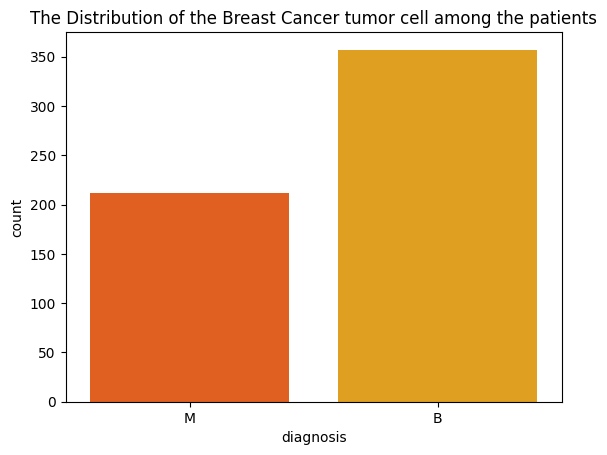

In [9]:
# Visualizing the distribution with a bar plot
sns.countplot(x = df['diagnosis'], label="count", palette = "autumn")
plt.title("The Distribution of the Breast Cancer tumor cell among the patients")
plt.show()

#### Inference: 
>Thus we have 357 benign (non-cancerous) cells and 212 malignant (cancerous) cells.

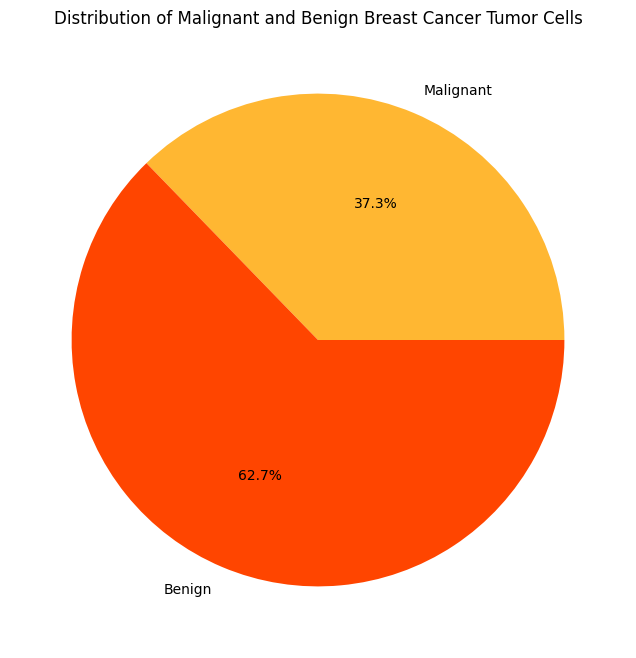

In [10]:
# Visualizing the distribution with a pie chart
benign_count = df['diagnosis'].value_counts()['B']
malignant_count = df['diagnosis'].value_counts()['M']

plt.figure(figsize=(8, 8))
plt.pie([malignant_count, benign_count], labels=['Malignant', 'Benign'], autopct='%1.1f%%', colors = ['#FFB732', '#FF4500'])
plt.title("Distribution of Malignant and Benign Breast Cancer Tumor Cells")
plt.show()

#### Inference: 
>We can see that the dataset is not imbalanced. Hence we can apply general machine learning algorithms for prediction.

### Encoding Categorical Variable

In [11]:
# Label Encoding: Convert the values of M and B into 1 and 0
lb = LabelEncoder()
df.iloc[:, 0] = lb.fit_transform(df.iloc[:, 0].values)

df.groupby('diagnosis').mean()


C:\Users\asus\AppData\Local\Temp\ipykernel_12064\79741343.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0] = lb.fit_transform(df.iloc[:, 0].values)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [12]:
# Checking the distribution of the target variable
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

* 0 &rarr; Benign
* 1 &rarr; Malignant

### Relation between each features distribution with the help of histogram.


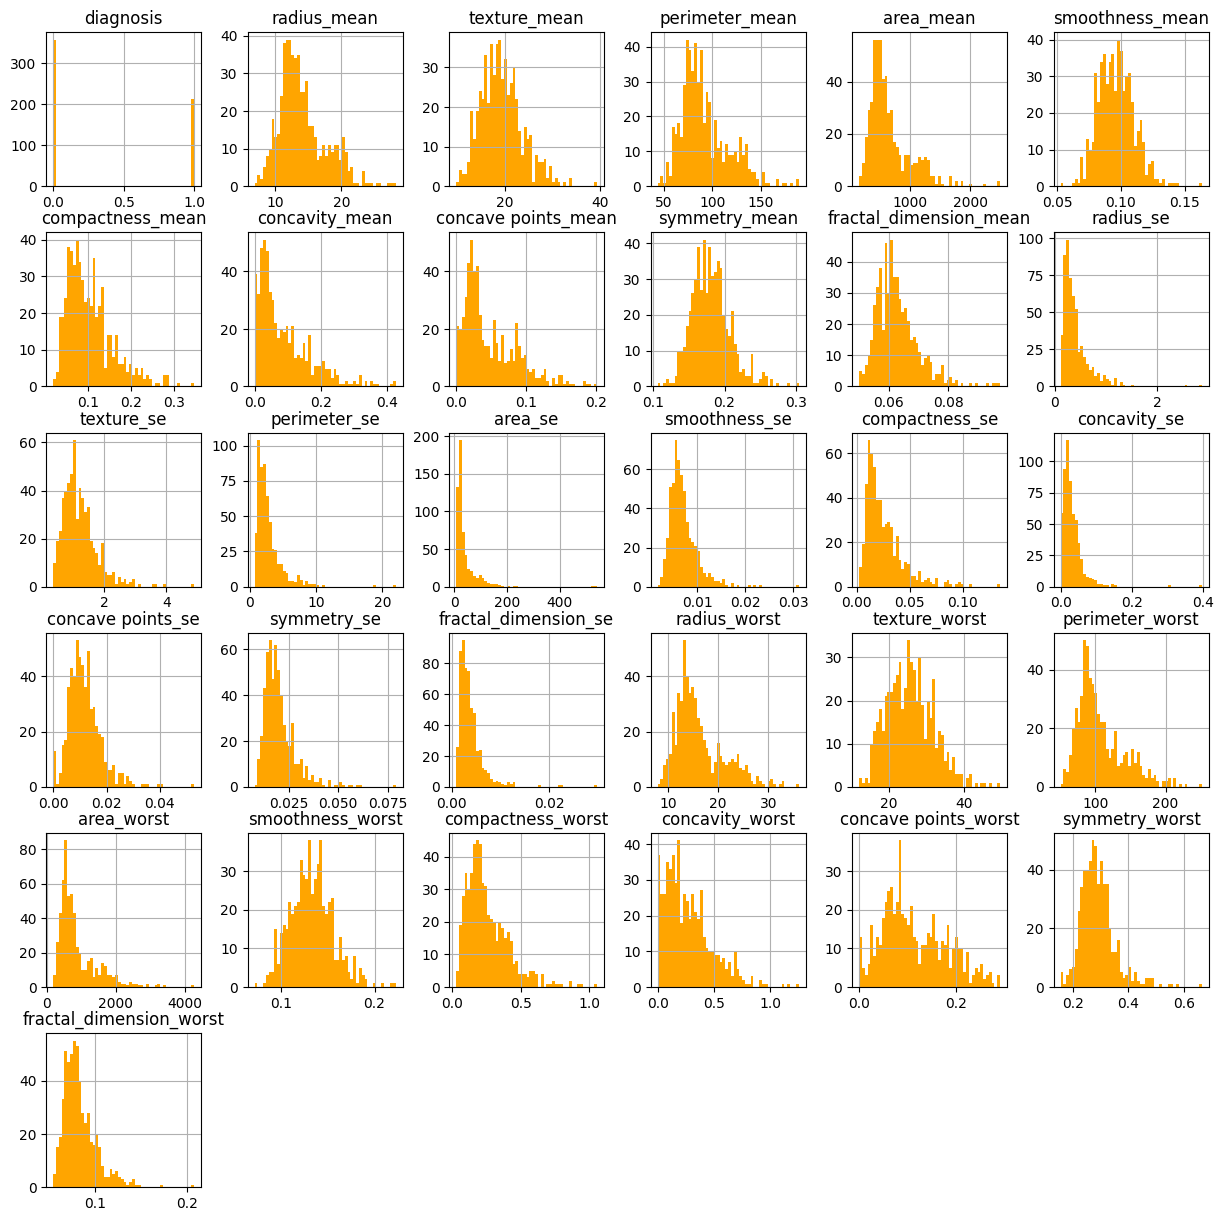

In [13]:
df.hist(bins = 50, figsize = (15,15), color = 'orange')
plt.show()

## Correlation Matrix

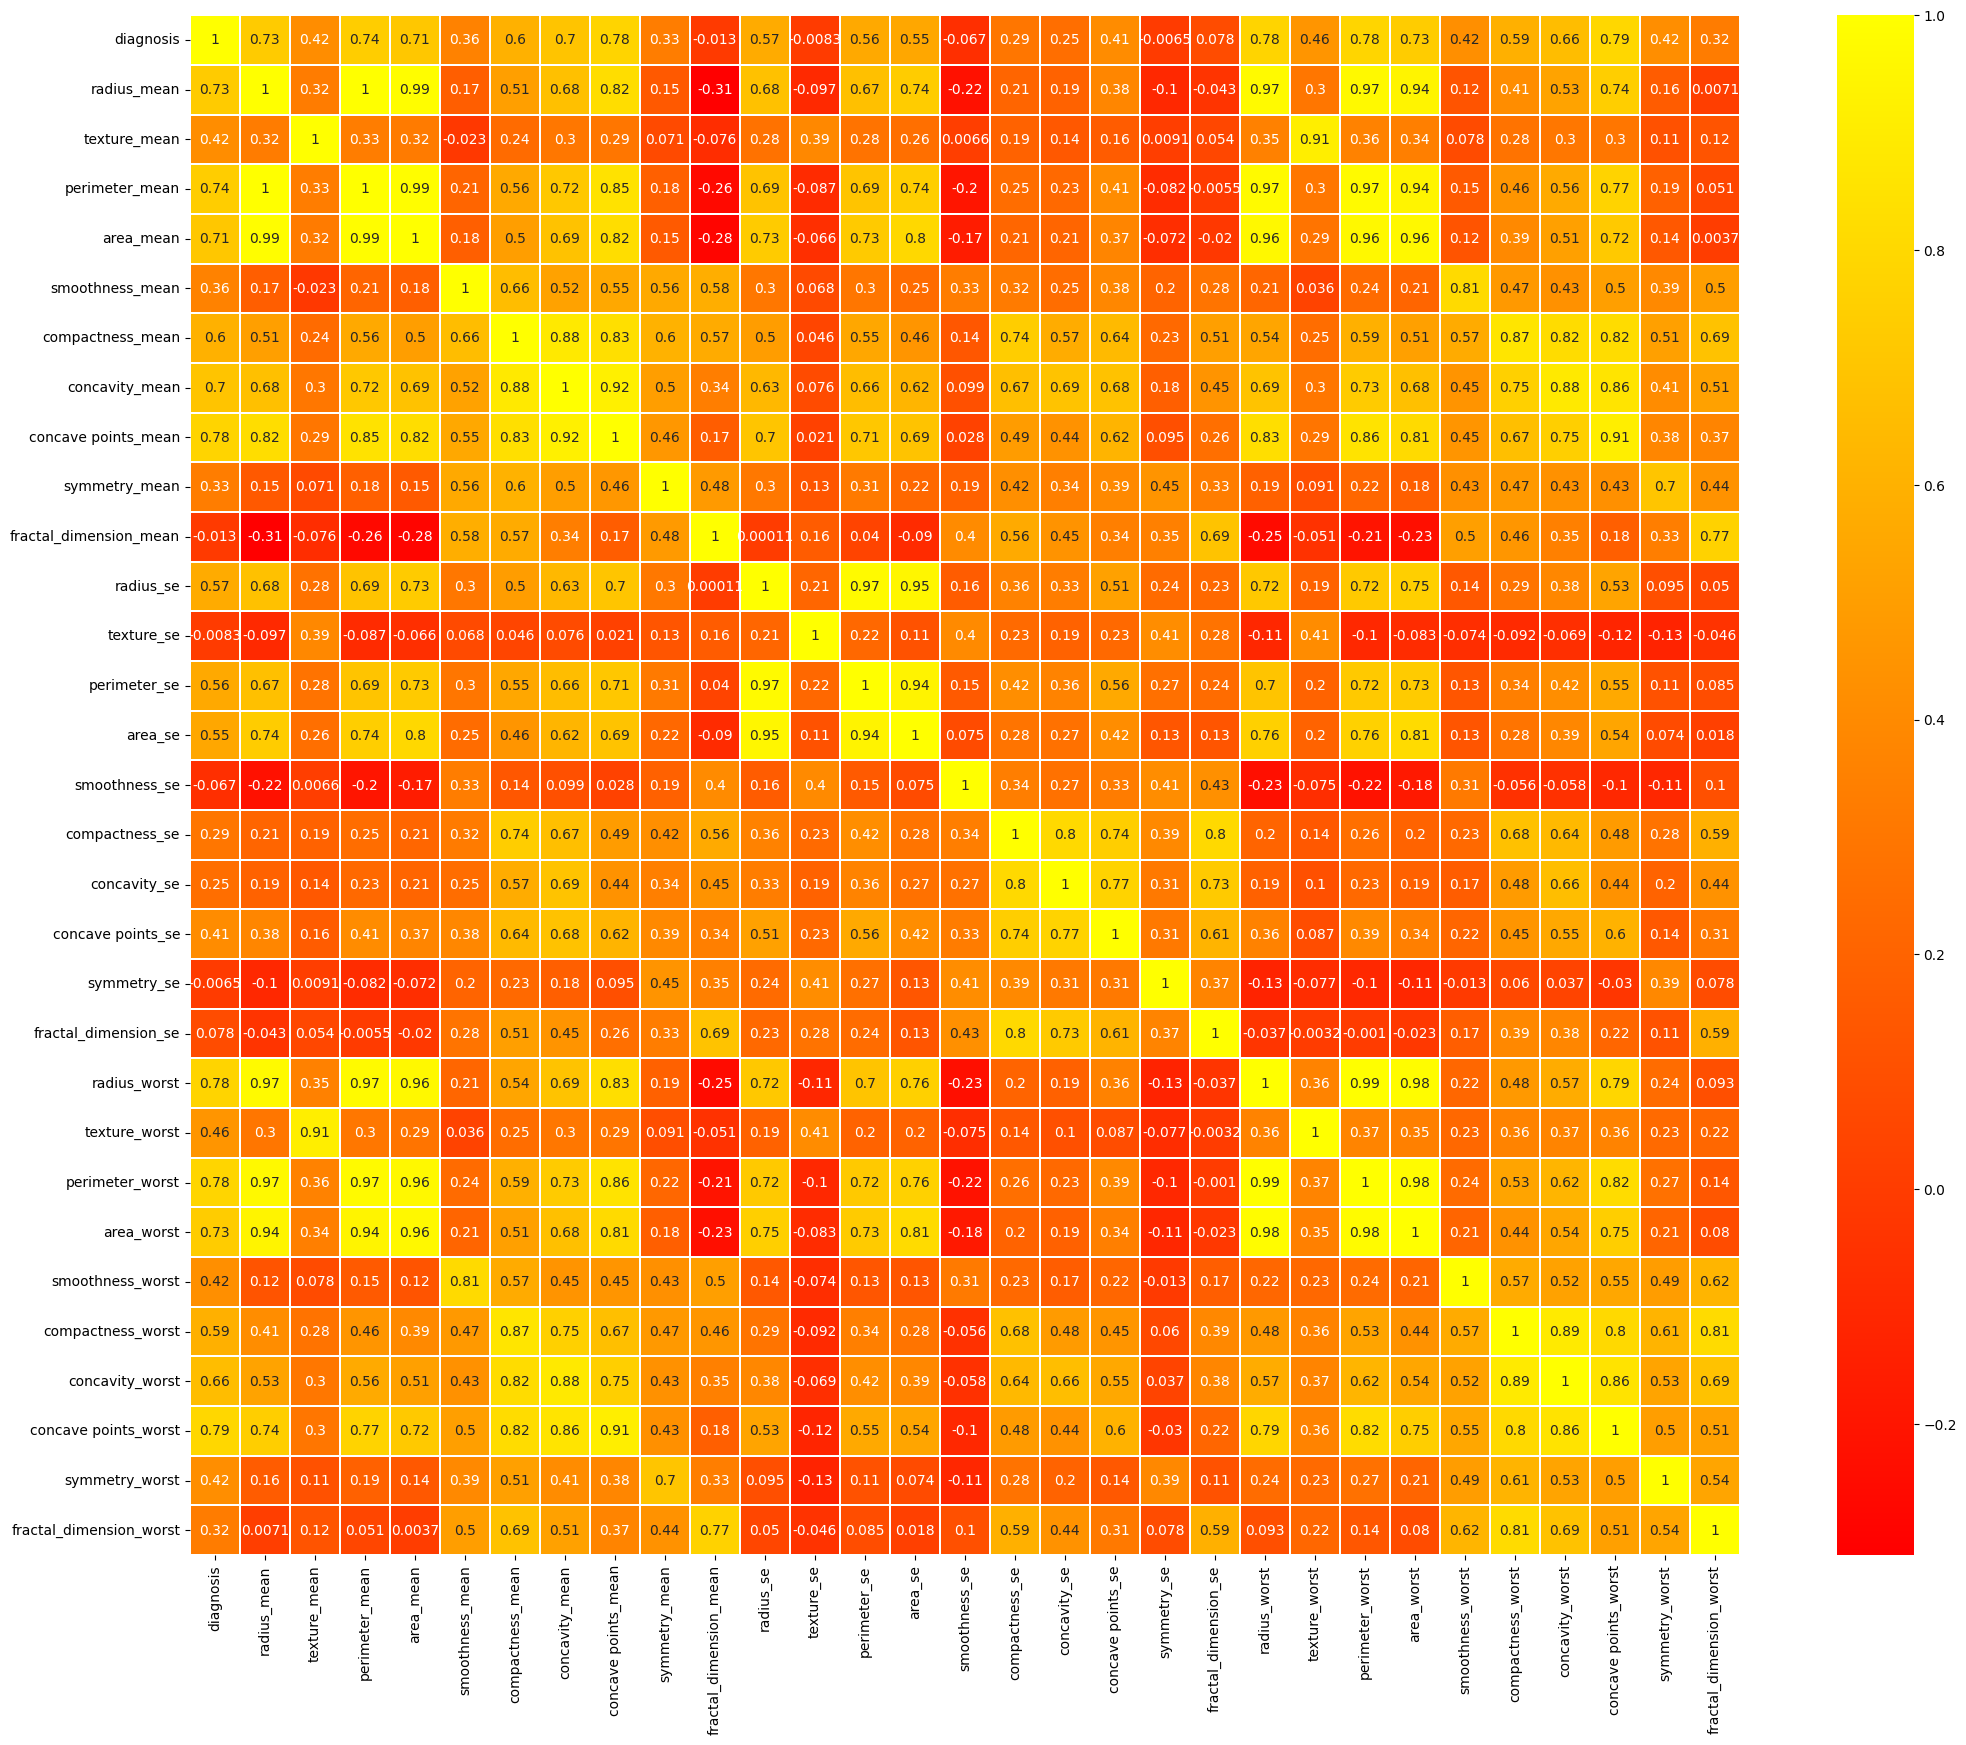

In [15]:
# Visualizing the data features to find the correlation between them which will infer the important features
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="autumn")
plt.show()

#### Insights from Correlation Matrix

>1. There is a strong positive correlation between many of the features, particularly among the mean features and worst features. For example, features like radius, perimeter, and area have strong positive correlations with each other.
>2. Features related to concavity, compactness, and concave points also show strong positive correlations with each other.
>3. The diagnosis feature (target variable) shows moderate to strong positive correlations with most of the other features. This indicates that these features might be useful in predicting the diagnosis of the cancer.
>4. Some features, such as smoothness and fractal dimension, have weaker correlations with other features, indicating they might not be as influential in determining the diagnosis.
>5. There are some features with negative correlations, but they are generally weaker compared to the positive correlations.

Overall, this correlation matrix provides valuable insights into the relationships between different features in the dataset and can guide feature selection and modeling strategies.


### Pairplot Analysis for First 5 Features


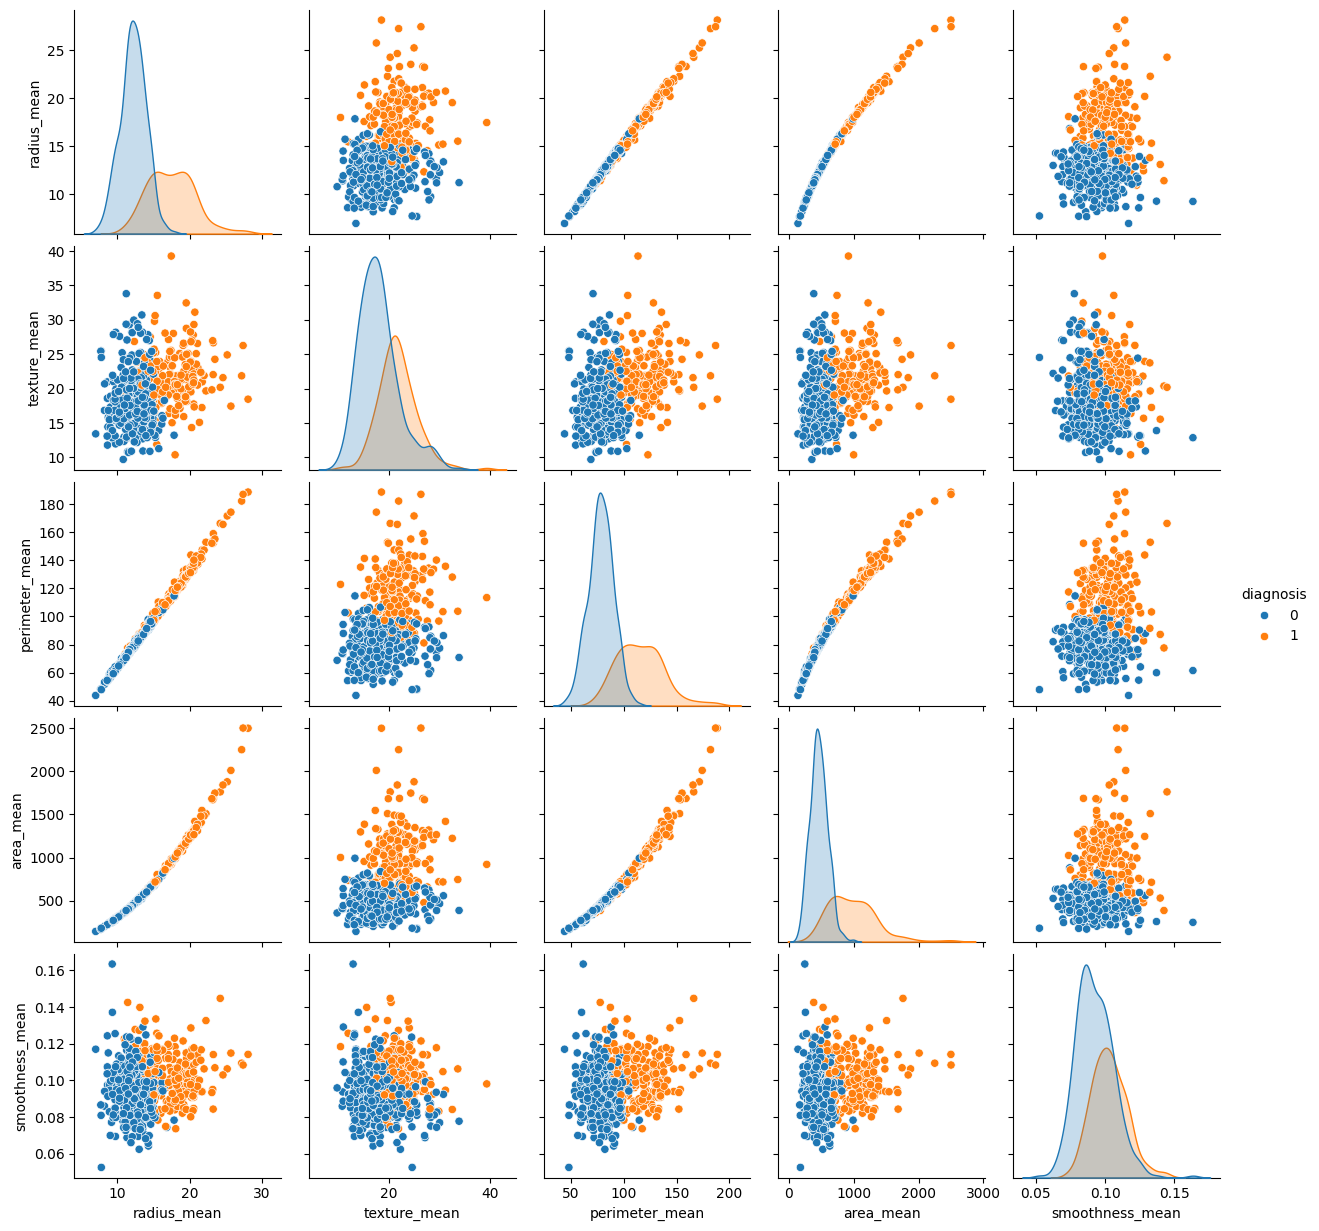

In [43]:
# Pairplot to visualize the relationship between the first 5 features of the dataset, with each scatterplot colored by the diagnosis class.
sns.pairplot(df.iloc[:, 0:6], hue="diagnosis")

#### Insights from Pair Plot

>1. The mean radius and the mean texture of the breasts although do not show any significant linear association among them, but it is clear that the higher the both the greater the chance of the cancer cells to be malignant.
>2. The mean radius has a strong linear relationship with the mean perimeter which is mathematically quite obvious. Here also, we see that higher the radius or the perimeter higher the danger.
>3. The above statement is almost same in case of other relations as well, such as - radius mean and area mean, perimeter mean and area mean, radius mean and area mean. Although in some of the cases the relation may not be perfectly linear.
>4. The mean radius of the breasts do not show any great association with the mean smoothness of the breast. Although the increment in the smoothness does not conclude on the cancer state, but higher the radius value the greater the chance of being cancerous.
>5. The same conclusion in the above statement follows in the relation of the mean smoothness of the breasts with other parameters also, such as texture of the breasts or the perimeter or the area.

Overall, this pair-plot provides valuable insights into the relationships between different features in the dataset and can guide feature selection and modeling strategies.


In [17]:
# Split the dataset into dependent(X) and independent(Y) datasets
X = df.iloc[:, 1:32].values
Y = df.iloc[:, 0].values

# Tain-Test Split

In [18]:
# Splitting data into train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

> We split the whole dataset into train-set and test-set which contains 75% train and 25% test.

> We can include this train set into classifiers to train our model and the test set is useful for predicting the performance of the model by different classifiers.

# Feature Scaling

* **Normalization** The primary objective of normalisation is to **homogenise** the data **across** all **records** and fields. It **aids** in connecting the entering data, which in turn helps in **cleaning and enhancing** data **quality**. Normalization is used when the data values are skewed and do not follow gaussian distribution.
The data values get converted between a range of 0 and 1.
The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.
* **Standardization** is the process of placing dissimilar features on the same scale. Standardization is used on the data values that are normally distributed. By applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.
That is, by standardizing the values, we get the following statistics of the data distribution
  1. mean = 0
  2. standard deviation = 1

In [19]:
st  = StandardScaler()
X_train  = st.fit_transform(X_train)
X_test  = st.transform(X_test)

In [20]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [21]:
Y_train.shape, Y_test.shape

((426,), (143,))

# Algorithm Implementation

In [27]:
def evaluate_models(X_train, Y_train, X_test, Y_test):
    models = [
        LogisticRegression(),
        KNeighborsClassifier(),
        SVC(kernel='linear'),
        SVC(kernel='rbf'),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier()
    ]
    
    model_names = [
        "Logistic Regression",
        "K Nearest Neighbors",
        "SVC Linear",
        "SVC RBF",
        "Gaussian NB",
        "Decision Tree",
        "Random Forest"
    ]
    
    results = []
    
    for model, model_name in zip(models, model_names):
        # Fit the model
        model.fit(X_train, Y_train)
        
        # Predictions on training and testing data
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        
        # Compute metrics
        train_accuracy = accuracy_score(Y_train, train_predictions)
        test_accuracy = accuracy_score(Y_test, test_predictions)
        cm = confusion_matrix(Y_test, test_predictions)
        cr = classification_report(Y_test, test_predictions)
        
        # Plot the confusion matrix as a heatmap 
        plt.figure(figsize=(4, 2))
        sns.heatmap(cm, annot=True, fmt='d', cmap='autumn', cbar=True)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()
        
        results.append({
            "Model Name": model_name,
            "Training Accuracy": train_accuracy,
            "Testing Accuracy": test_accuracy,
            "Classification Report": cr
        })
    
    return results

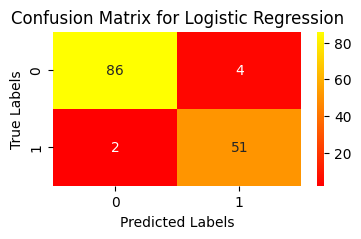

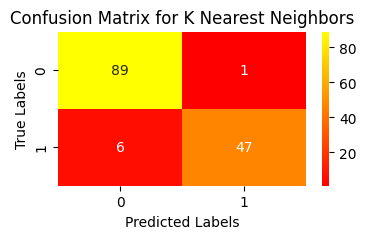

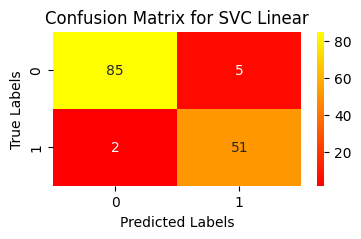

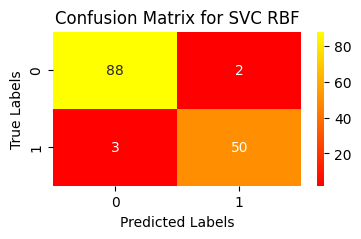

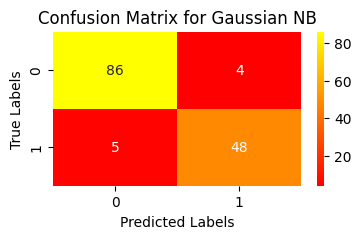

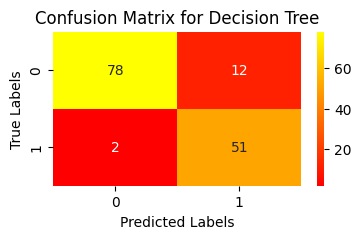

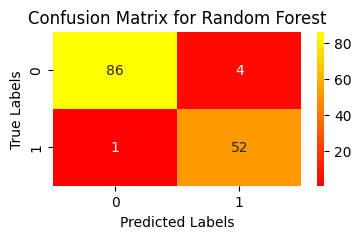

Logistic Regression
Training Accuracy: 0.9906103286384976
Testing Accuracy: 0.958041958041958
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

K Nearest Neighbors
Training Accuracy: 0.9741784037558685
Testing Accuracy: 0.951048951048951
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

SVC Linear
Training Accuracy: 0.9859154929577465
Testing Accuracy: 0.951048951048951
Classification Report:
    

In [26]:
evaluation_results = evaluate_models(X_train, Y_train, X_test, Y_test)

# Print the evaluation results
for result in evaluation_results:
    print(result["Model Name"])
    print("Training Accuracy:", result["Training Accuracy"])
    print("Testing Accuracy:", result["Testing Accuracy"])
    print("Classification Report:")
    print(result["Classification Report"])
    print("=" * 50)

## Model Evaluation Results

### Logistic Regression
- **Training Accuracy:** 99.06%
- **Testing Accuracy:** 95.80%
- Precision, Recall, and F1-score are high for both classes (0 and 1), indicating a good overall performance.

### K Nearest Neighbors
- **Training Accuracy:** 97.41%
- **Testing Accuracy:** 95.10%
- Similar to Logistic Regression, KNN shows high precision, recall, and F1-score for both classes.

### SVC Linear
- **Training Accuracy:** 98.59%
- **Testing Accuracy:** 95.10%
- High precision, recall, and F1-score for both classes, indicating good performance.

### SVC RBF
- **Training Accuracy:** 98.59%
- **Testing Accuracy:** 96.50%
- Very high accuracy with excellent precision, recall, and F1-score for both classes, indicating the best performance among the models.

### Gaussian NB
- **Training Accuracy:** 94.83%
- **Testing Accuracy:** 93.70%
- While Gaussian NB has slightly lower accuracy compared to other models, it still shows a decent performance with good precision, recall, and F1-score.

### Decision Tree
- **Training Accuracy:** 100%
- **Testing Accuracy:** 90.90%
- Decision Tree shows high accuracy on the training data but slightly lower on the testing data, indicating some overfitting.

### Random Forest
- **Training Accuracy:** 100%
- **Testing Accuracy:** 97.20%
- Random Forest performs well with high accuracy and good precision, recall, and F1-score for both classes.

Based on these results, Random Forest seems to be the best-performing model for this dataset, followed closely by SVC with RBF kernel (SVC RBF) and SVC Linear. Decision Tree shows signs of overfitting, as it performs perfectly on the training data but slightly worse on the testing data.


### Final Model Implementation

In [55]:
# Train Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

# Save the model
import joblib
joblib.dump(model_rf, 'rf_model.pkl')

['rf_model.pkl']

In [87]:
# Load the saved model
loaded_model = joblib.load('rf_model.pkl')

# Define input data
#input_data = np.array([19.54,14.36,87.46,566.3,0.09779,0.08129,0.06667,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259])
#input_data = np.array([95,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773])
input_data = np.array([13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259])
# Reshape input data
input_data_reshaped = input_data.reshape(1, -1)

# Make prediction
prediction = loaded_model.predict(input_data_reshaped)
prediction_probability = loaded_model.predict_proba(input_data_reshaped)
b_prob = prediction_probability[0][0]
m_prob = prediction_probability[0][1]
# Interpret the prediction
if prediction == 0:
    print('The breast cancer is Benign')
else:
    print('The breast cancer is Malignant')



The breast cancer is Malignant


## Conclusion  
> * Hence, Random Forest Classifier seems to be working the best on the data. Hence, it can be used as the solution of the Breast Cancer prediction problem.
